<a href="https://colab.research.google.com/github/gkunal8019/Adult-Census-Income-Prediction/blob/main/Adult_Census_Income_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [100]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
%matplotlib inline
from copy import deepcopy as copy 

In [101]:
url = "https://raw.githubusercontent.com/gkunal8019/Adult-Census-Income-Prediction/main/adult.csv"
#names = ['age', 'workclass', 'fnlwgt', 'education', 'educationNum','maritalStatus','occupation','relationship','race','sex','capitalGain','capitalLoss','hoursPerWeek','nativeCountry','Output']
df = pd.read_csv(url)

In [102]:
df.head().T

,0,1,2,3,4
age,39,50,38,53,28
workclass,State-gov,Self-emp-not-inc,Private,Private,Private
fnlwgt,77516,83311,215646,234721,338409
education,Bachelors,Bachelors,HS-grad,11th,Bachelors
education-num,13,13,9,7,13
marital-status,Never-married,Married-civ-spouse,Divorced,Married-civ-spouse,Married-civ-spouse
occupation,Adm-clerical,Exec-managerial,Handlers-cleaners,Handlers-cleaners,Prof-specialty
relationship,Not-in-family,Husband,Not-in-family,Husband,Wife
race,White,White,White,Black,Black
sex,Male,Male,Male,Male,Female


In [103]:
df.shape

(32561, 15)

In [104]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  country         32561 non-null  object
 14  salary          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [105]:
df.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


We can notice above that the dataset has no Null Values, in form on N/A or 0 but it does have null in form of '?"

In [106]:
# Missing Values:
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
country           0
salary            0
dtype: int64

In [107]:
df = df.dropna(how='any') 
df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


Mapping Salary column to zero and one with less than 50k and greater than 50k respectively

In [108]:
df.rename(columns={'salary': 'Income'}, inplace=True)
df.head(0)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country,Income


In [109]:
df["Income"].value_counts()

 <=50K    24720
 >50K      7841
Name: Income, dtype: int64

<Figure size 1440x720 with 0 Axes>

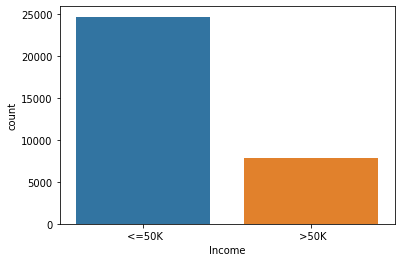

<Figure size 1440x720 with 0 Axes>

In [110]:
import matplotlib.pyplot as plt
sns.countplot(x="Income", data=df)
plt.figure(figsize=(20,10))

The proportion of records having income less than 50K dollars is more than the proportion of records having more than 50k dollars.#####

Text(0.5, 1.0, 'division of the salary based on gender')

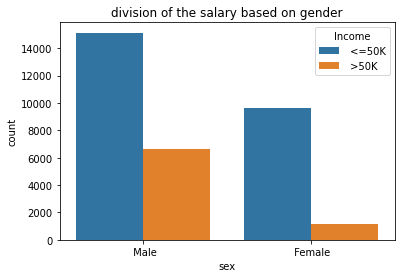

In [111]:
sns.countplot(x='sex',hue='Income',data=df)
plt.title("division of the salary based on gender")

The above chart shows the division of the salary based on gender where 0 is people with less than 50k and 1 is people with greater than 50k salary

Text(0.5, 1.0, 'division of the salary based on education')

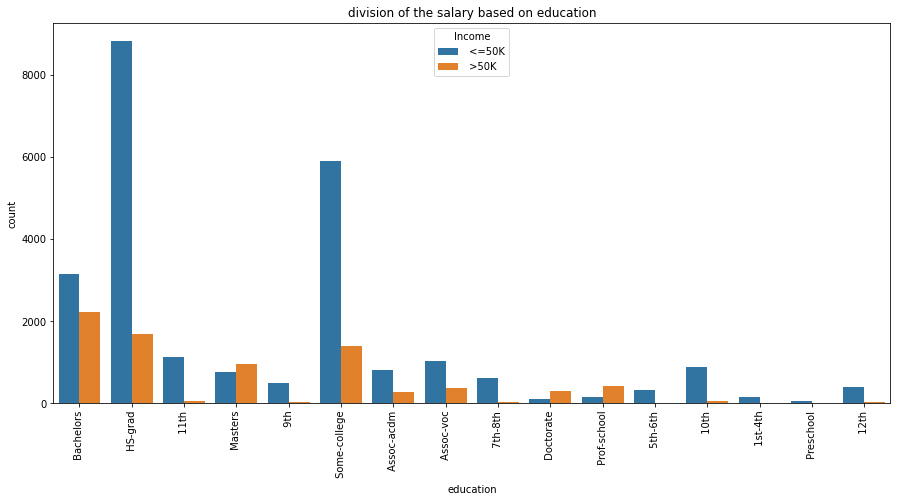

In [112]:
plt.figure(figsize=(15,7))
sns.countplot(x='education',hue='Income',data=df)
plt.xticks(rotation=90)
plt.title("division of the salary based on education")

The above chart shows the division of the salary based on education where 0 is people with less than 50k and 1 is people with greater than 50k salary

Text(0.5, 1.0, 'division of the salary based on workclass')

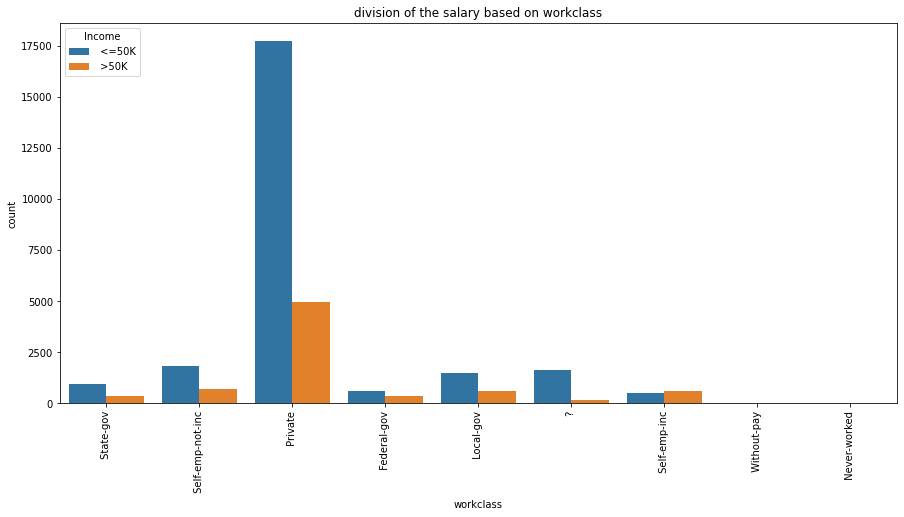

In [113]:
plt.figure(figsize=(15,7))
sns.countplot(x='workclass',hue='Income',data=df)
plt.xticks(rotation=90)
plt.title("division of the salary based on workclass")

The below chart shows the division of the salary based on workclass where 0 is people with less than 50k and 1 is people with greater than 50k salary

Text(0.5, 1.0, 'division of the salary based on age')

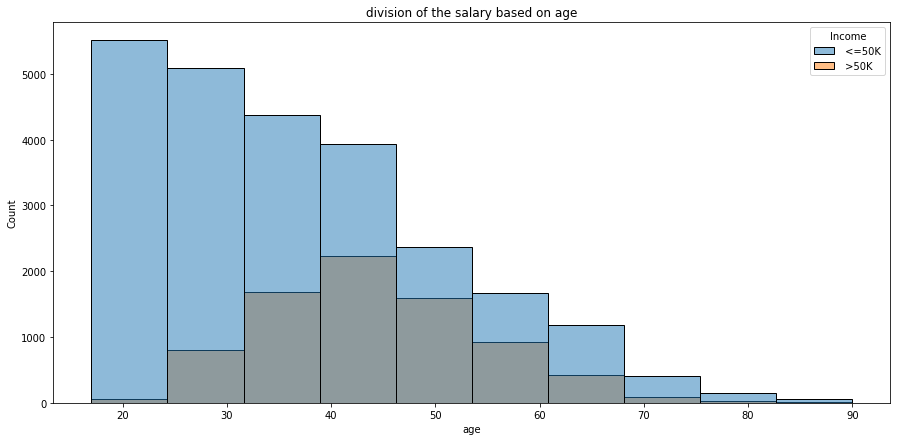

In [114]:
plt.figure(figsize=(15,7))
sns.histplot(x='age',hue='Income', bins=10,data=df)
plt.title("division of the salary based on age")

The below chart shows the division of the salary based on age where 0 is people with less than 50k and 1 is people with greater than 50k salary

# F.E

We see there are some '?' values in Workclass, occupation and country. So replacing them with nan values and maybe dropping them would help.

In [115]:
df['country'] = df['country'].replace('?',np.nan)
df['workclass'] = df['workclass'].replace('?',np.nan)
df['occupation'] = df['occupation'].replace('?',np.nan)

df.dropna(how='any',inplace=True)

In [116]:
df.shape

(32561, 15)

Dividing the dataset into US and Non-US countries as the majority of the dataset is from US.

In [117]:
df.loc[df['country'] != 'United-States', 'country'] = 'Non-US'
df.loc[df['country'] == 'United-States', 'country'] = 'US'

df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country,Income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,Non-US,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,Non-US,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,Non-US,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,Non-US,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Non-US,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,Non-US,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,Non-US,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,Non-US,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,Non-US,<=50K


Text(0.5, 1.0, 'division of the salary based on countries(US and Others)')

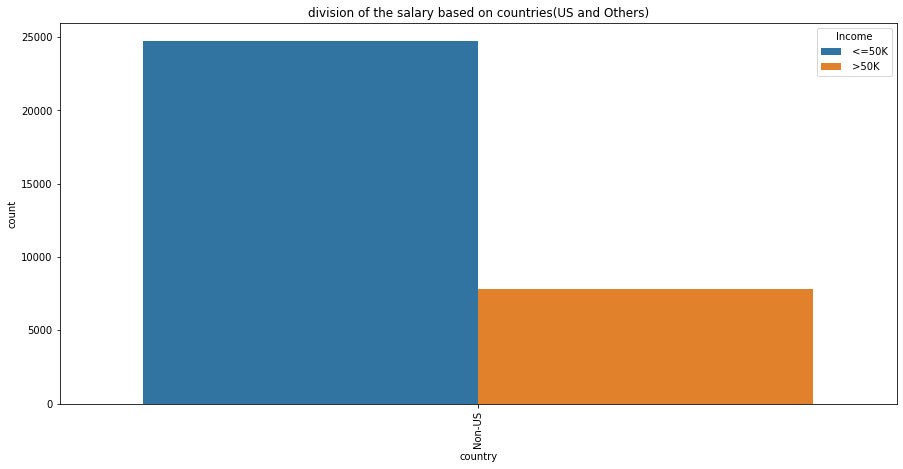

In [118]:
plt.figure(figsize=(15,7))
sns.countplot(x='country',hue='Income',data=df)
plt.xticks(rotation=90)
plt.title("division of the salary based on countries(US and Others)")

Mapping values 1 and 0 with US and Non-US countries

In [119]:
df['country'] = df['country'].map({'US':1,'Non-US':0}).astype(int)
df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country,Income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,0,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,0,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,0,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,0,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,0,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,0,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,0,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,0,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,0,<=50K


Text(0.5, 1.0, 'division of the salary based on hours-per-week')

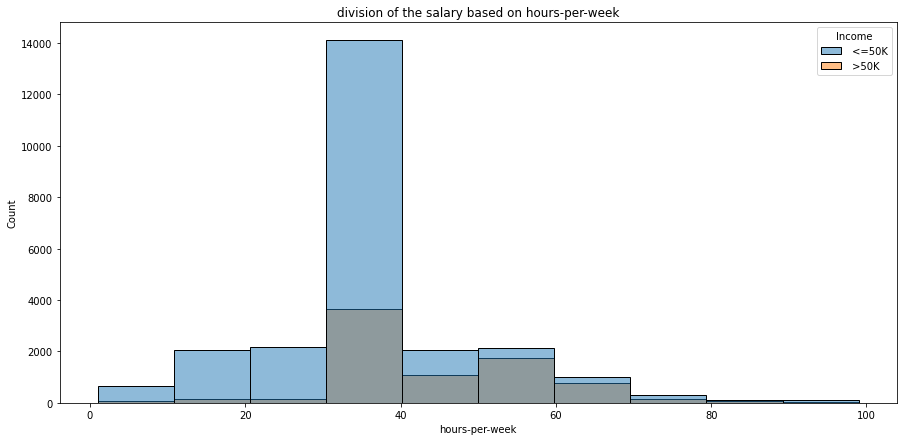

In [120]:
#The below chart shows the division of the salary based on hours-per-week where 0 is people with less than 50k and 1
# is people with greater than 50k salary
plt.figure(figsize=(15,7))
sns.histplot(x='hours-per-week',hue='Income', bins=10,data=df)
plt.title("division of the salary based on hours-per-week")

In [121]:
df['marital-status'] = df['marital-status'].replace(['Divorced','Married-spouse-absent','Never-married','Separated','Widowed'],'Single')
df['marital-status'] = df['marital-status'].replace(['Married-AF-spouse','Married-civ-spouse'],'Couple')
df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country,Income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,0,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,0,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,0,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,0,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,0,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,0,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,0,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,0,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,0,<=50K


Mapping values 1 and 0 with single and couple

In [122]:
df['marital-status'] = df['marital-status'].map({'Couple':0,'Single':1})
   
df.head(10)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country,Income
0,39,State-gov,77516,Bachelors,13,NaN,Adm-clerical,Not-in-family,White,Male,2174,0,40,0,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,NaN,Exec-managerial,Husband,White,Male,0,0,13,0,<=50K
2,38,Private,215646,HS-grad,9,NaN,Handlers-cleaners,Not-in-family,White,Male,0,0,40,0,<=50K
3,53,Private,234721,11th,7,NaN,Handlers-cleaners,Husband,Black,Male,0,0,40,0,<=50K
4,28,Private,338409,Bachelors,13,NaN,Prof-specialty,Wife,Black,Female,0,0,40,0,<=50K
5,37,Private,284582,Masters,14,NaN,Exec-managerial,Wife,White,Female,0,0,40,0,<=50K
6,49,Private,160187,9th,5,NaN,Other-service,Not-in-family,Black,Female,0,0,16,0,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,NaN,Exec-managerial,Husband,White,Male,0,0,45,0,>50K
8,31,Private,45781,Masters,14,NaN,Prof-specialty,Not-in-family,White,Female,14084,0,50,0,>50K
9,42,Private,159449,Bachelors,13,NaN,Exec-managerial,Husband,White,Male,5178,0,40,0,>50K


Mapping values 0, 1, 2, 3, 4 and 5 with Unmarried, Wife, Husband, Not-in-family, own-child and other-relative respectively

In [123]:
relationship_map = {'Unmarried':0,'Wife':1,'Husband':2,'Not-in-family':3,'Own-child':4,'Other-relative':5}

df['relationship'] = df['relationship'].map(relationship_map)
    
df.head(10)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country,Income
0,39,State-gov,77516,Bachelors,13,NaN,Adm-clerical,NaN,White,Male,2174,0,40,0,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,NaN,Exec-managerial,NaN,White,Male,0,0,13,0,<=50K
2,38,Private,215646,HS-grad,9,NaN,Handlers-cleaners,NaN,White,Male,0,0,40,0,<=50K
3,53,Private,234721,11th,7,NaN,Handlers-cleaners,NaN,Black,Male,0,0,40,0,<=50K
4,28,Private,338409,Bachelors,13,NaN,Prof-specialty,NaN,Black,Female,0,0,40,0,<=50K
5,37,Private,284582,Masters,14,NaN,Exec-managerial,NaN,White,Female,0,0,40,0,<=50K
6,49,Private,160187,9th,5,NaN,Other-service,NaN,Black,Female,0,0,16,0,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,NaN,Exec-managerial,NaN,White,Male,0,0,45,0,>50K
8,31,Private,45781,Masters,14,NaN,Prof-specialty,NaN,White,Female,14084,0,50,0,>50K
9,42,Private,159449,Bachelors,13,NaN,Exec-managerial,NaN,White,Male,5178,0,40,0,>50K


Mapping values 0, 1, 2, 3 and 4 with White, Amer-Indian-Eskimo, Asian-Pac-Islander, Black and Other respectively

In [124]:
race_map={'White':0,'Amer-Indian-Eskimo':1,'Asian-Pac-Islander':2,'Black':3,'Other':4}


df['race']= df['race'].map(race_map)
    
df.head(10)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country,Income
0,39,State-gov,77516,Bachelors,13,NaN,Adm-clerical,NaN,NaN,Male,2174,0,40,0,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,NaN,Exec-managerial,NaN,NaN,Male,0,0,13,0,<=50K
2,38,Private,215646,HS-grad,9,NaN,Handlers-cleaners,NaN,NaN,Male,0,0,40,0,<=50K
3,53,Private,234721,11th,7,NaN,Handlers-cleaners,NaN,NaN,Male,0,0,40,0,<=50K
4,28,Private,338409,Bachelors,13,NaN,Prof-specialty,NaN,NaN,Female,0,0,40,0,<=50K
5,37,Private,284582,Masters,14,NaN,Exec-managerial,NaN,NaN,Female,0,0,40,0,<=50K
6,49,Private,160187,9th,5,NaN,Other-service,NaN,NaN,Female,0,0,16,0,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,NaN,Exec-managerial,NaN,NaN,Male,0,0,45,0,>50K
8,31,Private,45781,Masters,14,NaN,Prof-specialty,NaN,NaN,Female,14084,0,50,0,>50K
9,42,Private,159449,Bachelors,13,NaN,Exec-managerial,NaN,NaN,Male,5178,0,40,0,>50K


Mapping values 0 and 1 with Male and Female

In [127]:
df = df.fillna(0)

In [ ]:
df['sex'] = df['sex'].map({'Male':1,'Female':0}).astype(int)
df